In [1]:
import tensorflow as ft
import matplotlib.pyplot as plt

from tensorflow import keras
from keras import layers
from keras.datasets import fashion_mnist

# load the fashion mnist dataset from Keras API

(train_images_full, train_labels_full), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
train_images_full.shape

(60000, 28, 28)

In [3]:
train_labels_full.shape

(60000,)

In [4]:
train_labels_full[0]

9

In [5]:
# callback when the model reaches 97% accuracy

class tfCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy")>=0.97:
      print("\nReached 97% accuracy!")
      self.model.stop_training = True 

callbacks=tfCallback()


In [6]:

# preprocess the the dataset

train_images_full = train_images_full.reshape(60000, 28, 28, 1)
train_images_full = train_images_full / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [7]:
train_images_full.shape

(60000, 28, 28, 1)

In [8]:
train_images_full[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
# create a validation set with 5000 examples from the training set

validation_images, train_images = train_images_full[:5000], train_images_full[5000:]
validation_labels, train_labels = train_labels_full[:5000], train_labels_full[5000:]

print(validation_images.shape)
print(train_images.shape)

(5000, 28, 28, 1)
(55000, 28, 28, 1)


In [10]:
train_labels[0]

4

In [11]:
# build a deep learning model with 2 CNN layers and a densely connected layer

model = keras.models.Sequential([layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1),name='conv1'),
                                 layers.MaxPooling2D((2,2),name='2max1'),
                                 layers.Conv2D(32, (3,3), activation="relu",name='3conv2'),
                                 layers.MaxPooling2D((2,2),name='4max2'),
                                 layers.Dropout(0.2,name='5drop1'),
                                 layers.Flatten(name='fc1'),
                                 layers.Dense(128, activation="relu",name='fc2'),
                                 layers.Dense(10, activation="softmax")])

In [12]:
# use adam for model optimization

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam", 
              metrics=["accuracy"])



In [13]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=50,
                    validation_data=(validation_images, validation_labels),
                    callbacks=callbacks)

Epoch 1/50
1719/1719 [==============================] - 33s 19ms/step - loss: 0.5160 - accuracy: 0.8091 - val_loss: 0.3617 - val_accuracy: 0.8624
Epoch 2/50
1719/1719 [==============================] - 32s 18ms/step - loss: 0.3446 - accuracy: 0.8732 - val_loss: 0.3137 - val_accuracy: 0.8832
Epoch 3/50
1719/1719 [==============================] - 36s 21ms/step - loss: 0.2975 - accuracy: 0.8883 - val_loss: 0.2614 - val_accuracy: 0.9020
Epoch 4/50
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2717 - accuracy: 0.8996 - val_loss: 0.2575 - val_accuracy: 0.9034
Epoch 5/50
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2496 - accuracy: 0.9073 - val_loss: 0.2542 - val_accuracy: 0.9040
Epoch 6/50
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2308 - accuracy: 0.9128 - val_loss: 0.2391 - val_accuracy: 0.9102
Epoch 7/50
1719/1719 [==============================] - 35s 20ms/step - loss: 0.2166 - accuracy: 0.9183 - val_loss: 0.2347 -

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

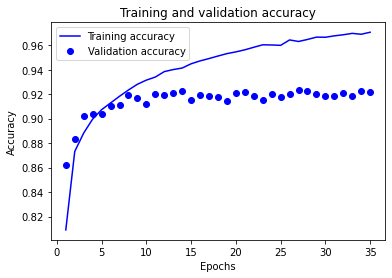

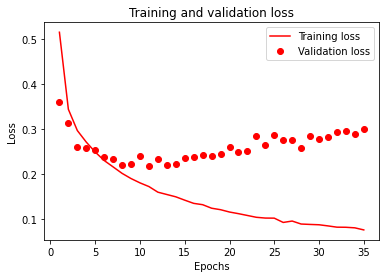

In [15]:
# plot the accuracy and loss

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "b-", label="Training accuracy")
plt.plot(epochs, val_accuracy, "bo", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "r-", label="Training loss")
plt.plot(epochs, val_loss, "ro", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [16]:
!pip install pyyaml h5py 

In [17]:
def save(self,save_path):
        self.keras_model.save(save_path)

In [18]:
model.save('fashion-mnist.h5')

In [19]:
model.save_weights('fashion-mnistweights.h5')

In [ ]:
import os
os.chdir(r'/kaggle/working')
model.save('fashion-mnist.h5')
model.save_weights('fashion-mnistweights.h5')
#!zip -r file.zip '/kaggle/working/'
from IPython.display import FileLink
FileLink(r'fashion-mnist.h5')
FileLink(r'fashion-mnistweights.h5')